# Web Server Locations of the Most Accessed Websites in Brazil
An Exploration of Digital Asymmetries and Digital Decoloniality. An Exploration of Digital Asymmetries and Digital Decoloniality. List of the 100 most accessed sites in Brazil from Semrush.


Luiz Ludwig (@luizludwig) <br>
2024


In [1]:
!pip install ipinfo
!pip install ipywidgets
!pip install seaborn matplotlib

In [2]:
import numpy as np # linear algebra
import pandas as pd 
import socket
import ipinfo
import ipywidgets as widgets
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("ipinfo")

In [4]:
#Create an array with the 100 most visited websites in Brazil according to Semrush


list_of_urls = [
 'google.com', 'youtube.com', 'globo.com', 'xvideos.com', 'instagram.com', 'whatsapp.com', 
 'uol.com.br', 'facebook.com', 'google.com.br', 'tudocelular.com', 'pornhub.com', 
 'amazon.com.br', 'x.com', 'mercadolivre.com.br', 'live.com', 'wikipedia.org', 
 'caixa.gov.br', 'tiktok.com', 'twitter.com', 'chatgpt.com', 'microsoft.com', 
 'shopee.com.br', 'netflix.com', 'olx.com.br', 'betano.com', 'gov.br', 'yahoo.com', 
 'bing.com', 'sp.gov.br', 'aliexpress.com', 'terra.com.br', 'reddit.com', 'twitch.tv', 
 'microsoftonline.com', 'correios.com.br', 'linkedin.com', 'msn.com', 'xbox.com', 
 'magazineluiza.com.br', 'roblox.com', 'pinterest.com', 'openai.com', 'canva.com', 
 'eneba.com', 'tsuki-mangas.com', 'cnnbrasil.com.br', 'fazenda.gov.br', 'office.com', 
 'discord.com', 'xnxx.com', 'bet365.com', 'letras.mus.br', 'reclameaqui.com.br', 
 'primevideo.com', 'weather.com', 'fatalmodel.com', 'metropoles.com', 'duckduckgo.com', 
 'animefire.plus', 'spotify.com', 'jusbrasil.com.br', 'max.com', 'redecanais.dev', 
 'kabum.com.br', 'amazon.com', 'xhamster.com', 'brasil247.com', 'animesonlinecc.to', 
 'tempo.com', 'samsung.com', 'adorocinema.com', 'claro.com.br', 'gupy.io', 
 'bet7k.com', 'vivo.com.br', 'ig.com.br', 'tecmundo.com.br', 'github.com', 
 'amazonaws.com', 'climatempo.com.br', 'espn.com.br', 'serasa.com.br', 'hotmart.com', 
 'estrelabet.com', 'casasbahia.com.br', 'tudogostoso.com.br', 'pr.gov.br', 
 'abril.com.br', 'mg.gov.br', 'telegram.org', 'futemax.fo', 'linktr.ee', 
 'multicanais.blog', 'pichau.com.br', 'disneyplus.com', 'meutimao.com.br', 
 'webmotors.com.br', 'anota.ai', 'tjsp.jus.br', 'r7.com'
]

df = pd.DataFrame(list_of_urls, columns=['url'])

In [5]:
#From the array, access the latitude via the ipinfo module for each URL

handler = ipinfo.getHandler(secret_value_0)

for i, url_input in enumerate(df['url']):
    try:
        ip_numero = socket.gethostbyname(url_input)            #Acess IP number from url
        details = handler.getDetails(ip_numero)                #Acess details from IP number
        hostname = details.details.get('hostname', '')
        org = details.details.get('org', '')
        country_name = details.details.get('country_name', '')
        lat_value, lon_value = details.loc.split(',')          
        
        #Creating new columns for the table
        df.loc[i, 'Hostname'] = hostname
        df.loc[i, 'Organization'] = org
        df.loc[i, 'Country_Name'] = country_name
        df.loc[i, 'Latitude'] = lat_value
        df.loc[i, 'Longitude'] = lon_value
        
    except socket.gaierror as e:
        continue
        

In [6]:
df.to_csv('filename.csv', index=False)
df.head(10)


,url,Hostname,Organization,Country_Name,Latitude,Longitude
0,google.com,pw-in-f139.1e100.net,AS15169 Google LLC,United States,45.5946,-121.1787
1,youtube.com,ie-in-f136.1e100.net,AS15169 Google LLC,United States,45.5946,-121.1787
2,globo.com,186-192-83-12.prt.globo.com,AS28604 Globo Comunicação e Participaçoes SA,Brazil,-23.5475,-46.6361
3,xvideos.com,,"AS46652 DigitalOcean, LLC",Netherlands,52.3740,4.8897
4,instagram.com,instagram-p42-shv-01-sea1.fbcdn.net,"AS32934 Facebook, Inc.",United States,47.6062,-122.3321
5,whatsapp.com,whatsapp-cdn-shv-01-sea1.fbcdn.net,"AS32934 Facebook, Inc.",United States,47.6062,-122.3321
6,uol.com.br,200-147-35-149-149.static.uol.com.br,AS7162 Universo Online S.A.,Brazil,-23.5475,-46.6361
7,facebook.com,edge-star-mini-shv-01-sea1.facebook.com,"AS32934 Facebook, Inc.",United States,47.6062,-122.3321
8,google.com.br,pi-in-f94.1e100.net,AS15169 Google LLC,United States,45.5946,-121.1787
9,tudocelular.com,,"AS13335 Cloudflare, Inc.",United States,37.7621,-122.3971


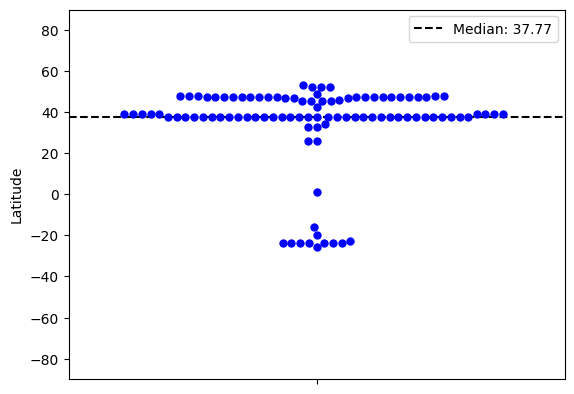

In [7]:
latitudes = df['Latitude'].astype(float)
latitudes_clean = latitudes.dropna()

# Criando o swarmplot
sns.swarmplot(data=df, y=latitudes_clean, size=6, color='blue')


# Calcular a média e a mediana
median = np.median(latitudes_clean)
mean = np.mean(latitudes_clean)

# Adicionar linha da mediana
plt.axhline(median, color='black', linestyle='--', label=f'Median: {median:.2f}')
#plt.axhline(mean, color='black', linestyle='-', label=f'Mean: {mean:.2f}')
plt.ylim(-90, 90)

# Exibir a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

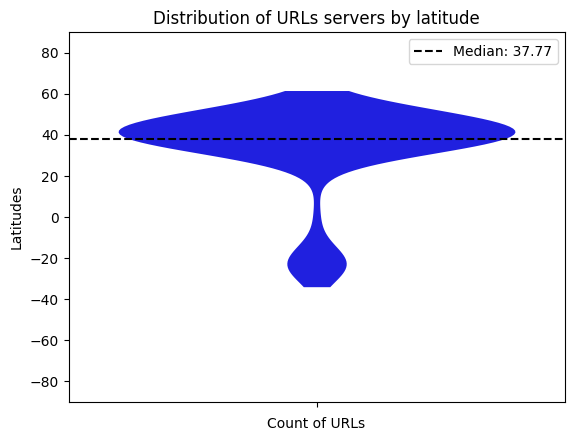

In [8]:
# Criando o violin plot
sns.violinplot(data=df, y=latitudes_clean, inner=None, color="blue",bw_adjust=.5, cut=1, linewidth=0)

# Calcular a média e a mediana
median = np.median(latitudes_clean)
mean = np.mean(latitudes_clean)


plt.xlabel('Count of URLs')
plt.ylabel('Latitudes')
plt.title('Distribution of URLs servers by latitude')


# Adicionar linha da mediana
plt.axhline(median, color='black', linestyle='--', label=f'Median: {median:.2f}')

# Definir os limites do eixo y (Latitude varia de -90 a 90)
plt.ylim(-90, 90)

# Exibir a legenda
plt.legend()

# Exibir o gráfico
plt.show()

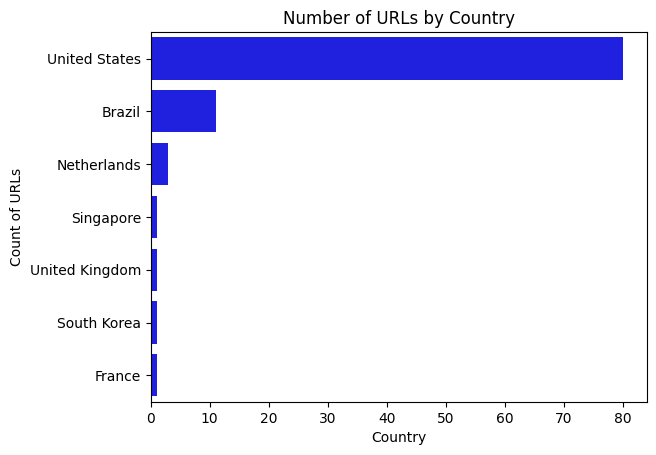

In [9]:
country_counts = df['Country_Name'].value_counts()

# Create a bar plot
sns.barplot(y=country_counts.index, x=country_counts.values, color='blue')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count of URLs')
plt.title('Number of URLs by Country')

# Rotate the x labels for better readability if needed
plt.xticks(rotation=0)

# Display the plot
plt.show()

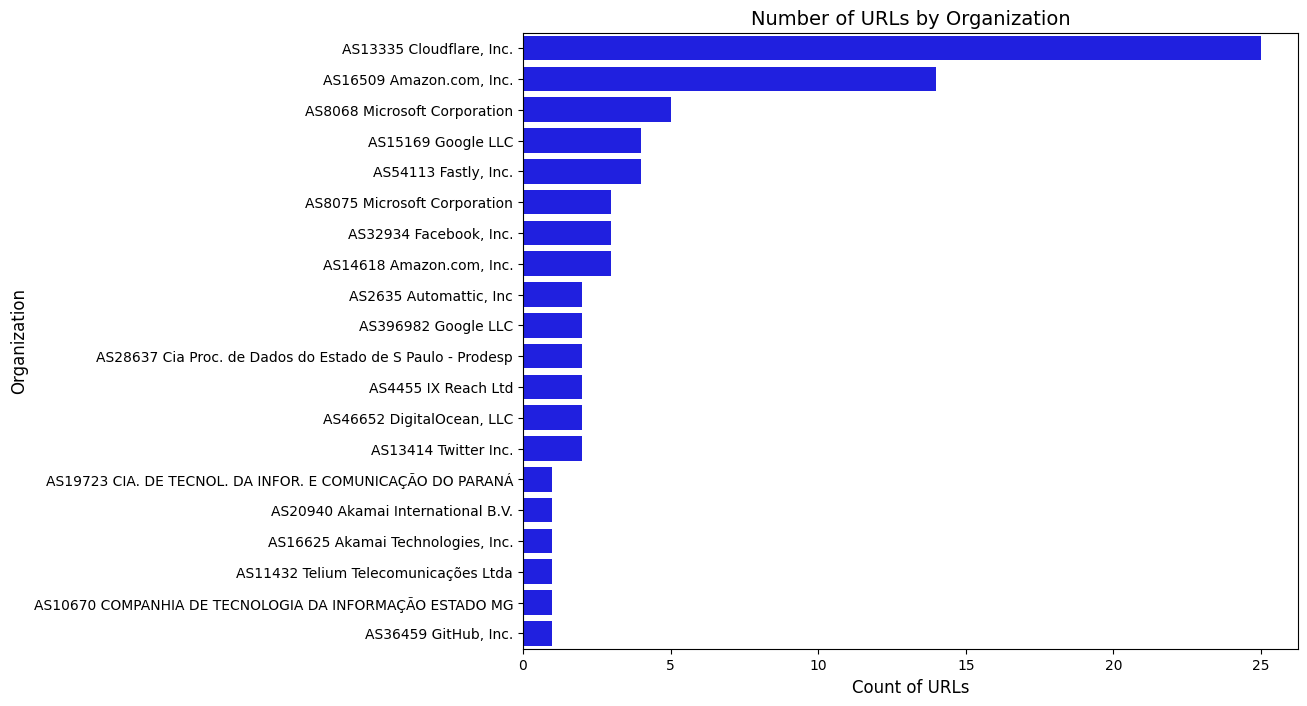

In [10]:
org_counts = df['Organization'].value_counts()

plt.figure(figsize=(10, 8))

# Create a bar plot
sns.barplot(y=org_counts.index[:20], x=org_counts.values[:20], color='blue')  # Show top 20 organizations

# Add labels and title
plt.xlabel('Count of URLs', fontsize=12)
plt.ylabel('Organization', fontsize=12)
plt.title('Number of URLs by Organization', fontsize=14)

# Optionally, set font size for y-axis labels (organization names)
plt.yticks(fontsize=10)

# Display the plot
plt.show()